### E12 Project finding similar face
- 목적
    - embedding에 대한 이해
    - triple loss에 대한 이해 
    - 컴퓨터 비전 기술을 이용한 닮은 얼굴 찾기

In [1]:
import face_recognition
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib as mpl
import numpy as np
from PIL import Image

%matplotlib inline

#### 1. 함수

In [36]:
# 이미지에서 얼굴을 crop하는 함수
def get_cropped_face(image_file):
    
    crop_dir_path = os.getenv('HOME')+'/Aiffel/12_face_embedding/crop_images/'
    crop_file_name = os.path.basename(image_file)
    crop_file_name = os.path.splitext(crop_file_name)
    path_to_save = crop_dir_path + crop_file_name[0] + '.jpg'
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
   
    pillow_image = Image.fromarray(cropped_face)
    pillow_image.save(path_to_save)
    return cropped_face

# crop된 이미지를 embedding하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# embedding dictionary를 만드는 함수 
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    
    return embedding_dict

# embedding한 값을 이용하여 거리를 계산하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)


def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

def get_nearest_face(name, top=6):
    image_path = os.getenv('HOME') + '/Aiffel/12_face_embedding/crop_images/'
    crop_image_path = image_path + name + '.jpg'
    image = img.imread(crop_image_path)
    plt.figure(figsize=(12, 12))
    plt.subplot(6, 1, 1)
    plt.title(f'{name}과 닮은 연예인은?')
    plt.axis('off')
    plt.imshow(image)
    
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            #print(f'순위 {i} : 이름({sorted_faces[i][0]}), 거리({sort_key_func(sorted_faces[i][0])}')
            crop_image_path = image_path + sorted_faces[i][0] + '.jpg'
            image = img.imread(crop_image_path)
            plt.subplot(6, 1, i+1)
            
            plt.title(f'순위 {i} : 이름({sorted_faces[i][0]}), 거리({sort_key_func(sorted_faces[i][0])}')
            plt.axis('off')
            plt.imshow(image)
                          

#### 2. 닮은 얼굴 찾기

In [42]:
dir_path = os.getenv('HOME')+'/Aiffel/12_face_embedding/images'
embedding_dict = get_face_embedding_dict(dir_path)

#### 3. 결과

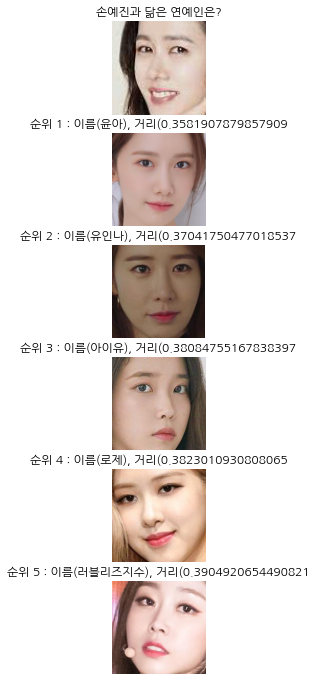

In [45]:
get_nearest_face('손예진')

#### 4. 고찰
- 제 사진을 하나는 안경을 쓰고 하나는 안경을 쓰지 않고 넣어서 결과를 확인하여도 제 사진이 1순위가 나오는 것을 보면 안경이 큰 영향을 주지 않는 것도 같지만 나머지 순위의 연예인들은 모두 안경을 쓰고 있는 사진이 나온것을 보면 닮은 꼴을 찾는데 하나의 특징일 것이라고 예상이 됩니다. 또한 제 사진이 가장 순위가 높은 것으로 보아 모델의 성능이 나쁘지 않다고 생각합니다.  
- 닮은 연예인으로 유명한 사람들의 사진을 넣고 결과를 확인하면 순위안에 그 연예인이 있는 경우가 많았고 닮았다고 생각하지 않았지만 크롭된 이미지를 출력하여 보았을때 서로 닮은 듯한 느낌을 주는 사진들을 많이 확인할 수 있었습니다.
- 많은 양의 데이터를 모으지 못하여 아쉬운 부분이 있는데 이후에는 외국 연예인을 포함하여 더 많은 사진을 추가한다면 더 재미있을 것 같습니다.
- 아직 시각화를 하거나 UI를 잘 만들지 못하여 다른 프로그램으로 만들어보지 못한것이 아쉽지만 나중에 이 프로젝트를 더 진행하여 재밌는 프로젝트를 만들어 보면 좋을 것 같습니다. 